In [1]:
import numpy as np
import json

In [18]:
influence_values = np.load('outputs/MNIST/test/image_classifier/influence_function_softmax/use_hessian:True,norm_grad:True/influence_values.npy')
influence_values_rep = np.load('outputs/MNIST/test/image_classifier/representer_points_with_sec/influence_values.npy')
training_idx, validation_idx = [json.load(open(f'outputs/MNIST/test/image_classifier/influence_function_softmax/use_hessian:False/{x}_idx.json')) for x in ['training', 'validation']]

In [19]:
pred = [json.loads(line) for line in open("outputs/MNIST/test/image_classifier/predictions.dev.jsonl")]

In [20]:
devclasses = [p['gold_labels'] for p in pred]
influence_values_rep = np.concatenate([influence_values_rep[i, :, p][None, :] for i, p in enumerate(devclasses)], axis=0)

(array([ 68.,  36.,  84., 121.,  30.,  32.,  46.,  51.,  29.,   3.]),
 array([-0.7185021 , -0.66658546, -0.61466881, -0.56275217, -0.51083553,
        -0.45891889, -0.40700225, -0.35508561, -0.30316897, -0.25125233,
        -0.19933568]),
 <BarContainer object of 10 artists>)

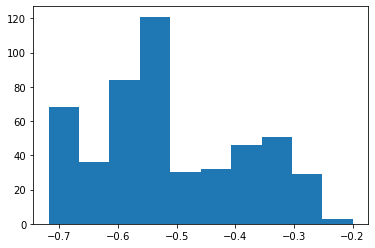

In [21]:
from scipy.stats import spearmanr
corr = [spearmanr(x, y).correlation for x, y in zip(influence_values, influence_values_rep)]

import matplotlib.pyplot as plt 
plt.hist(corr)

In [57]:
influence_values.min()

-1238.6382

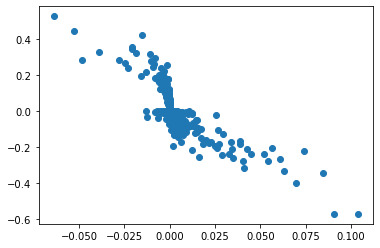

In [49]:
plt.scatter(influence_values[200], influence_values_rep[200])

In [22]:
from influence_info.dataset_readers.image_reader import ImageReader
reader = ImageReader(as_is=True)
training_data = {i: (image, label) for (i, image, label) in list(reader._read('train'))}
validation_data = {i: (image, label) for (i, image, label) in list(reader._read('dev'))}

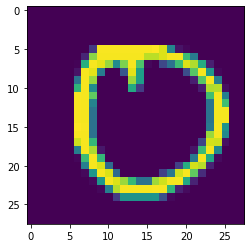

---
-0.0011985581
-0.0012311747
-0.0012338143
-0.0012359906
-0.001278046


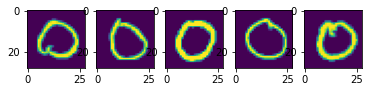

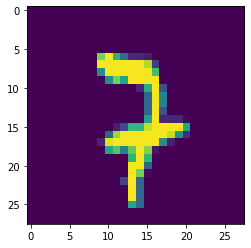

---
-0.0012064052
-0.0012142406
-0.0012188375
-0.0012231823
-0.0012330215


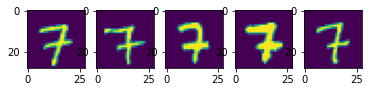

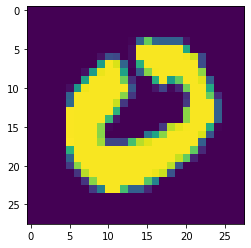

---
-0.0011542154
-0.0011583572
-0.0011657879
-0.001168485
-0.0011728297


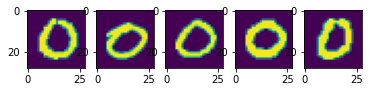

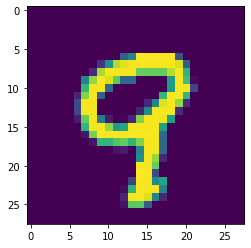

---
-0.0012238931
-0.0012278381
-0.0012286267
-0.0012603062
-0.0012952319


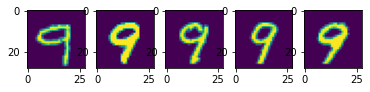

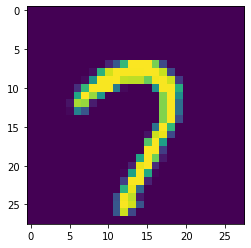

---
-0.001194847
-0.0011957097
-0.0012087689
-0.0012089745
-0.001218585


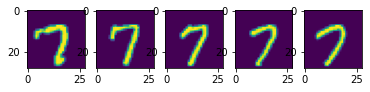

In [24]:
import random
import matplotlib.pyplot as plt

for i in range(5) :
    i = random.randint(0, 450)
    v = validation_data[i]
    plt.imshow(v[0][0])
    plt.show()
    print("---")
    vals = influence_values[i, :]
    top = np.argsort(vals)[:5]
    fig = plt.figure()
    for k, j in enumerate(top[::-1]) :
        print(vals[j])
        plt.subplot(1, 5, k + 1)
        plt.imshow(training_data[j][0][0])
    plt.show()
    print("==="*10)

In [ ]:
influence_values.shape